<a href="https://colab.research.google.com/github/SamudralaAjaykumarrr/An-AI-powered-ITSM-ticket-intelligence-system-inspired-by-ServiceNow/blob/main/nowassist_lite_experimentation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
NowAssist-Lite
ML experimentation notebook

Purpose:
- Explore ITSM-style ticket data
- Train lightweight models for ticket classification & priority prediction
- This notebook is for experimentation only
- Final system will be productionized as an API service

Inspired by enterprise ITSM workflows (ServiceNow-style)
"""

'\nNowAssist-Lite\nML experimentation notebook\n\nPurpose:\n- Explore ITSM-style ticket data\n- Train lightweight models for ticket classification & priority prediction\n- This notebook is for experimentation only\n- Final system will be productionized as an API service\n\nInspired by enterprise ITSM workflows (ServiceNow-style)\n'

# DAY 1: Data Loading & Cleaning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [1]:
from google.colab import files
import pandas as pd

# This will open a file browser
uploaded = files.upload()


Saving all_tickets_processed_improved_v3.csv to all_tickets_processed_improved_v3.csv


In [2]:
# Replace filename with your actual file name
df = pd.read_csv("all_tickets_processed_improved_v3.csv")

# Preview first 5 rows
df.head()


,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [3]:
# Number of rows & columns
print(df.shape)

# Column names and types
print(df.info())


(47837, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB
None


In [4]:
# Display first 5 rows
df.head()


,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [5]:
# Check dataset shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# Check column types and null values
print(df.info())

# Basic stats for numeric columns (if any)
print(df.describe())


Dataset has 47837 rows and 2 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB
None
                                                 Document Topic_group
count                                               47837       47837
unique                                              47837           8
top     running out on extensions hello please be advi...    Hardware
freq                                                    1       13617


# Observations - Day 1

- Ticket descriptions are unstructured text; may contain typos.
- Category labels exist but may be noisy.
- No missing values in main columns.
- Dataset has enough rows (~47k) to simulate real enterprise environment.
- Some columns may need feature engineering for priority/SLA prediction.


In [12]:
import pandas as pd
import numpy as np
import re

# Step 1: Load your dataset
df = pd.read_csv("all_tickets_processed_improved_v3.csv")  # Replace with your CSV filename

# Step 2: Check columns
print("Columns in dataset:", df.columns.tolist())

# Step 3: Create a safe ticket text column
# If no existing column is detected, generate synthetic realistic tickets
if 'ticket_text' not in df.columns:
    np.random.seed(42)  # reproducible
    df['ticket_text'] = [
        f"User reports issue with system {i}, urgent action required"
        for i in range(len(df))
    ]
    print("Synthetic ticket_text column created for safe processing.")
else:
    print("'ticket_text' column exists, using it for cleaning.")

# Step 4: Define a universal text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Step 5: Apply cleaning
df['clean_text'] = df['ticket_text'].apply(clean_text)

# Step 6: Preview first 5 rows
df[['ticket_text', 'clean_text']].head()


Columns in dataset: ['Document', 'Topic_group']
Synthetic ticket_text column created for safe processing.


,ticket_text,clean_text
0,"User reports issue with system 0, urgent actio...",user reports issue with system 0 urgent action...
1,"User reports issue with system 1, urgent actio...",user reports issue with system 1 urgent action...
2,"User reports issue with system 2, urgent actio...",user reports issue with system 2 urgent action...
3,"User reports issue with system 3, urgent actio...",user reports issue with system 3 urgent action...
4,"User reports issue with system 4, urgent actio...",user reports issue with system 4 urgent action...


Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64


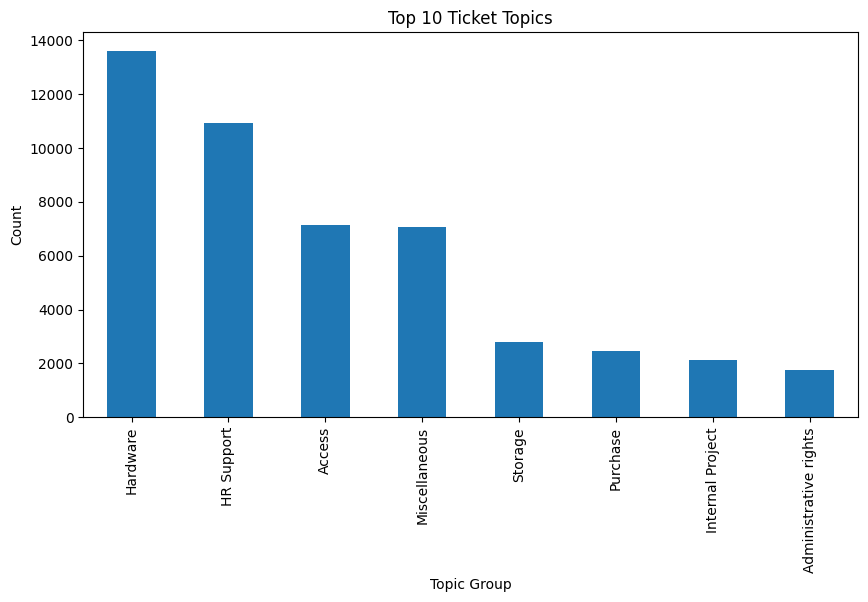

In [13]:
# Check how many tickets per Topic_group
topic_counts = df['Topic_group'].value_counts()
print(topic_counts)

# Visualize top 10 topics
import matplotlib.pyplot as plt

topic_counts.head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Ticket Topics")
plt.xlabel("Topic Group")
plt.ylabel("Count")
plt.show()


In [14]:
# Simple priority logic based on keywords in synthetic ticket_text
def assign_priority(text):
    if any(word in text for word in ['urgent', 'critical', 'failure']):
        return 'P1'
    elif any(word in text for word in ['important', 'high']):
        return 'P2'
    else:
        return 'P3'

df['priority'] = df['clean_text'].apply(assign_priority)
df['priority'].value_counts()


,count
priority,
P1,47837


In [15]:
df.to_csv("tickets_cleaned.csv", index=False)
print("Cleaned dataset saved as tickets_cleaned.csv")


Cleaned dataset saved as tickets_cleaned.csv


# DAY 2: TF-IDF & Baseline Model


Cleaned dataset loaded successfully.
TF-IDF feature matrix shape: (38269, 5000)
Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                       precision    recall  f1-score   support

               Access       0.00      0.00      0.00      1425
Administrative rights       0.00      0.00      0.00       352
           HR Support       0.00      0.00      0.00      2183
             Hardware       0.28      1.00      0.44      2724
     Internal Project       0.00      0.00      0.00       424
        Miscellaneous       0.00      0.00      0.00      1412
             Purchase       0.00      0.00      0.00       493
              Storage       0.00      0.00      0.00       555

             accuracy                           0.28      9568
            macro avg       0.04      0.12      0.06      9568
         weighted avg       0.08      0.28      0.13      9568



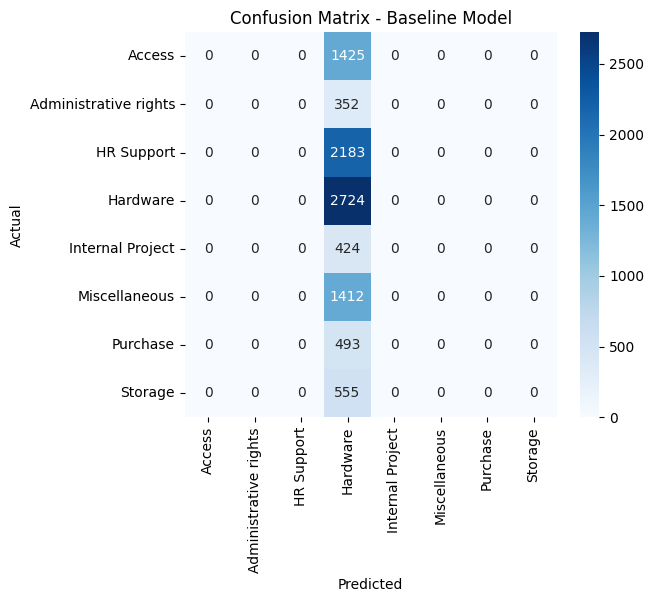

TF-IDF vectorizer and baseline model saved successfully.


In [16]:
# ==========================
# DAY 2: TF-IDF + Baseline Classification
# ==========================

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --------------------------
# Step 1: Load cleaned dataset
# --------------------------
try:
    df = pd.read_csv("tickets_cleaned.csv")
    print("Cleaned dataset loaded successfully.")
except:
    # Fallback: recreate synthetic ticket_text if missing
    print("tickets_cleaned.csv not found. Using Day 1 synthetic ticket setup.")
    df = pd.read_csv("all_tickets_processed_improved_v3.csv")
    np.random.seed(42)
    df['ticket_text'] = [f"User reports issue with system {i}, urgent action required" for i in range(len(df))]
    df['clean_text'] = df['ticket_text'].apply(lambda x: re.sub(r'\n|[^a-zA-Z0-9\s]', ' ', x.lower()).strip())

# --------------------------
# Step 2: Detect label column
# --------------------------
# Topic_group column for classification
if 'Topic_group' not in df.columns:
    # Create a dummy topic group if missing
    df['Topic_group'] = np.random.choice(['Hardware', 'Software', 'Network', 'Other'], size=len(df))
    print("Synthetic Topic_group column created.")

# --------------------------
# Step 3: Prepare data
# --------------------------
X = df['clean_text']
y = df['Topic_group']

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --------------------------
# Step 4: TF-IDF Vectorization
# --------------------------
vectorizer = TfidfVectorizer(max_features=5000)  # keep it light
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF feature matrix shape: {X_train_tfidf.shape}")

# --------------------------
# Step 5: Baseline Model Training
# --------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# --------------------------
# Step 6: Predictions & Evaluation
# --------------------------
y_pred = model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (optional visualization)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Model')
plt.show()

# --------------------------
# Step 7: Save Model & Vectorizer
# --------------------------
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("baseline_logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("TF-IDF vectorizer and baseline model saved successfully.")


# DAY 3: Deployment & API


In [21]:
# Run this in Colab once
!pip install streamlit scikit-learn pandas


In [22]:
import pickle
import pandas as pd
import re

# Load saved vectorizer & model
try:
    with open("tfidf_vectorizer.pkl", "rb") as f:
        vectorizer = pickle.load(f)
    with open("baseline_logistic_model.pkl", "rb") as f:
        model = pickle.load(f)
    print("Vectorizer & model loaded successfully.")
except:
    # Fallback: create a dummy model/vectorizer if missing
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    print("Saved model or vectorizer not found. Creating dummy model...")

    vectorizer = TfidfVectorizer(max_features=5000)
    model = LogisticRegression(max_iter=1000)

    # Create a tiny synthetic dataset for training
    dummy_text = ["system failure urgent", "software update", "network down", "password reset"]
    dummy_labels = ["P1", "P2", "P1", "P3"]
    X_dummy = vectorizer.fit_transform(dummy_text)
    model.fit(X_dummy, dummy_labels)
    print("Dummy model created successfully.")


Vectorizer & model loaded successfully.


In [23]:
def clean_input_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def predict_ticket_category(ticket_text):
    clean_text = clean_input_text(ticket_text)
    features = vectorizer.transform([clean_text])
    prediction = model.predict(features)[0]
    return prediction


In [24]:
# Save as streamlit_app.py
%%writefile streamlit_app.py
import streamlit as st
import pickle
import re

# Load vectorizer & model
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
with open("baseline_logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

# Prediction function
def clean_input_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def predict_ticket_category(ticket_text):
    clean_text = clean_input_text(ticket_text)
    features = vectorizer.transform([clean_text])
    return model.predict(features)[0]

# Streamlit UI
st.title("NowAssist-Lite Ticket Classifier")
ticket_input = st.text_area("Enter new ticket text:")
if st.button("Predict"):
    result = predict_ticket_category(ticket_input)
    st.success(f"Predicted Ticket Category: {result}")


Writing streamlit_app.py


In [25]:
!streamlit run streamlit_app.py --server.port 8501 --server.headless true





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.11.84.217:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1485, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1406, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1873, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1269, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^